In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scripts.analysis import data, plot

plot.init_matplotlib()
W, H = 5.5, 2.5

In [2]:
repo_with_campaign = data.get_repos_with_campaign()
stars_by_month = data.get_fake_stars_by_month()
stars_by_month = stars_by_month[stars_by_month.month != "2024-10"]

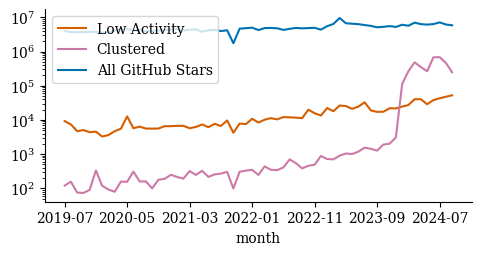

In [3]:
ts_fake = stars_by_month.groupby('month').sum()[["n_stars_low_activity", "n_stars_clustered"]]
ts_real = pd.read_csv("data/all_github_stars_by_month.csv")

fig, ax = plt.subplots(1, 1, figsize=(W, H))
ts_fake.plot(kind="line", ax=ax, color=["C2", "C3"])
ts_real.plot(kind="line", ax=ax, color="C0")
ax.set_yscale("log")
ax.legend(loc='upper left', labels=["Low Activity", "Clustered", "All GitHub Stars"])
ax.remove_spines()
fig.savefig("plots/stars.pdf", bbox_inches='tight')

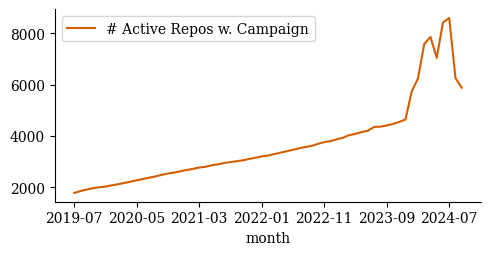

In [ ]:
ts_repos = stars_by_month.groupby('month').count()[["repo"]]

fig, ax = plt.subplots(1, 1, figsize=(W, H))
ts_repos.plot(kind="line", ax=ax, color="C2")
ax.legend(loc='upper left', labels=["# Active Repos w. Campaign"])
ax.remove_spines()
fig.savefig("plots/stars.pdf", bbox_inches='tight')